# **1. Defining the Question**

##a. Specifying the question

The question is to use KNN to classify the ones who could Survive the Titanic In the titanic Dataset. This Dataset is divided into train and test sets.

## b. Defining the metric of success 

The dataset Label (Y variable) contains those who suvived and those who did not. By having a high accuracy to recognize the one who survived and those whho did not will be best metric of success in this project.

## c. Understanding the context

The datasets contains X variables (Features) that could cause  the ones on board of the Titanic to survive or not.
Using KNN , we will Euclidean Distance to calculate the distances and classify the ones who survived and those who did not.

## d. Recording the experiment design

We shall be using K Nearest Neighbours.

**k Nearest Neighbor (or kNN )** is a supervised machine learning algorithm useful for classification problems. It calculates the distance between the test data and the input and gives the prediction according.


## e. Data Relevance


The data is very relevant, it contains many factors that predict the Y variable. This Data is hence very useful to achieve  our projects

#**2.Read Data**

## ***a. Import Dependencies***

In [ ]:
#Numpy is a library for python that supports multidimensional arrays and matrices as well as mathematical functions
import numpy as np
#Pandas is Python library used for data manipulation and data analysis
import pandas as pd
#Matplotlib is a python library utilised in plotting and its numerical capabilities
import matplotlib.pyplot as plt
#Seaborn is a Python data visualisation library basrd on matplotlib.
import seaborn as sns

## ***b. import the Data***

In [ ]:
#We have 2 datasets of the Titanic.We will load both of them now
titanic_test = pd.read_csv('/content/test (1).csv')
titanic_train= pd.read_csv('/content/train (5).csv')


# **3. Checking the Data**

## *a. Check first 5 Items in the Datasets*

In [ ]:
#We will inspect both Data 
#Checking for the first 5 items of the dataset
titanic_train.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:

titanic_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


## ***b.Check last 5 items of the Dataset***

In [ ]:
titanic_test.tail()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S
417,1309,3,"Peter, Master. Michael J",male,NaN,1,1,2668,22.3583,NaN,C


In [ ]:
titanic_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## ***c.Check columns for both datasets***

In [ ]:
titanic_test.columns

Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [ ]:
titanic_train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

i)passenger ID - This is the serial ID of a specific passenger

ii). Survived - A categorical variable of those who survived amd those who did not survive. , 1- Survived , 2- Did not Survive.

iii). Pclass - The passenger class in the Titanic Ship (classes 1,2,3)

iv). Name -  Full Name of the Passenger

v). sex - The gender of the passengers, either zFemale or male.

vi). Sibsp - Number of Siblings or spouses aboard in the titanic

vii). Parch -Number of Parents of children abard in the titanic.

viii). Ticket - Ticket Number

ix). Cabin - Cabin Number

x).Embarked - POrt of Embarkation (C- Cherbourg , Q - QueensTown , S - Southampton)

## ***d. Inspect values in a numpy array***

In [ ]:
titanic_test.values

array([[892, 3, 'Kelly, Mr. James', ..., 7.8292, nan, 'Q'],
       [893, 3, 'Wilkes, Mrs. James (Ellen Needs)', ..., 7.0, nan, 'S'],
       [894, 2, 'Myles, Mr. Thomas Francis', ..., 9.6875, nan, 'Q'],
       ...,
       [1307, 3, 'Saether, Mr. Simon Sivertsen', ..., 7.25, nan, 'S'],
       [1308, 3, 'Ware, Mr. Frederick', ..., 8.05, nan, 'S'],
       [1309, 3, 'Peter, Master. Michael J', ..., 22.3583, nan, 'C']],
      dtype=object)

In [ ]:
titanic_train.values

array([[1, 0, 3, ..., 7.25, nan, 'S'],
       [2, 1, 1, ..., 71.2833, 'C85', 'C'],
       [3, 1, 3, ..., 7.925, nan, 'S'],
       ...,
       [889, 0, 3, ..., 23.45, nan, 'S'],
       [890, 1, 1, ..., 30.0, 'C148', 'C'],
       [891, 0, 3, ..., 7.75, nan, 'Q']], dtype=object)

## ***e.inspect the Dataset Shapes***

In [ ]:
# we will also check the shape of the data i.e ( number of columns and Rows)
print('The total number of rows in the Titanic train dataset is : \n{}'.format(titanic_train.shape[0]))
print('The total number of columns in the Titanic train dataset is: \n {}'.format(titanic_train.shape[1]))

The total number of rows in the Titanic train dataset is : 
891
The total number of columns in the Titanic train dataset is: 
 12


In [ ]:
# we will also check the shape of the data i.e ( number of columns and Rows)
print('The total number of rows in the Titanic test dataset is : \n{}'.format(titanic_test.shape[0]))
print('The total number of columns in the Titanic test dataset is: \n {}'.format(titanic_test.shape[1]))

The total number of rows in the Titanic test dataset is : 
418
The total number of columns in the Titanic test dataset is: 
 11


From this we notice that the Titanic train has 12 columns but the Titanic test has 11 columns. This is because we are trying the test dataset y variable.

## ***f.Checking our Indexing Start to end using attribute Index.***

In [ ]:
#Checking our Indexing Start to end using sttribute Index.
titanic_test.index

RangeIndex(start=0, stop=418, step=1)

In [ ]:
titanic_test.index

RangeIndex(start=0, stop=418, step=1)

## ***g.Checking at the info of our DataFrame***

In [ ]:
#Info inspects the datatypes and the number of Non null columns
titanic_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [ ]:
titanic_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


We note that some columns have a different datatype.We shall deal with some of the unneeded columns in the next section.

## ***h.Check for unique values in the columns***

In [ ]:
#Check  for repetition of the number of different items in the columns.
print (titanic_test.nunique())

#Most columns that have less than 10 items mean they could be categorical columns. The rest are numericals

PassengerId    418
Pclass           3
Name           418
Sex              2
Age             79
SibSp            7
Parch            8
Ticket         363
Fare           169
Cabin           76
Embarked         3
dtype: int64


In [ ]:
print (titanic_train.nunique())

#Most columns that have less than 10 items mean they could be categorical columns. The rest are numericals

PassengerId    891
Survived         2
Pclass           3
Name           891
Sex              2
Age             88
SibSp            7
Parch            7
Ticket         681
Fare           248
Cabin          147
Embarked         3
dtype: int64


## ***i.Get the mathematical summaries***

In [ ]:
titanic_test.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [ ]:
titanic_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


# ***4.External Data Source Validation***


Making sure your data matches something outside of the dataset is very important. It allows you to ensure that the measurements are roughly in line with what they should be and it serves as a check on what other things might be wrong in your dataset. External validation can often be as simple as checking your data against a single number, as we will do here.

## ***a. Tidying the datasets***

1.Check for Null values

In [ ]:
# We start by checking for null values in our dataset

print(titanic_test.isnull().sum())
print(titanic_train.shape[0])

#cabin and Age have null values
#losing 327 out of 891 is such a lot of Data.

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64
891


In [ ]:
print(titanic_train.isnull().sum())
print(titanic_train.shape[0])
# Again Cabin and Age have null values
#Dropping 687 out of 891 of our data will mean we will lose a big bunch of it. Hence we will use another way to deal with it.

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64
891


ii. Check for duplicated values

In [ ]:
#we shall use the duplicated function.
titanic_train.duplicated().sum()
#We do not have duplicated values in the titanic train dataseey

0

In [ ]:
titanic_test.duplicated().sum()
#We do not have duplicated values in the titanic test dataset

0

iii). Dropping unwanted Columns.


In [ ]:
#columns such as passenger ID, Name  and Ticket are not very useful to  the Algorithm and 
#may reduce our accuracy and hence will be dropped.

titanic_train = titanic_train.drop(columns =['PassengerId','Name','Ticket'])

titanic_test = titanic_test.drop(columns =['PassengerId','Name','Ticket'])

In [ ]:
#We will drop Cabin
titanic_train = titanic_train.drop(columns = ['Cabin']) 
titanic_test = titanic_test.drop(columns = ['Cabin']) 

We will inspect the shape to see the change.

In [ ]:
titanic_train.shape

(891, 8)

In [ ]:
titanic_test.shape

(418, 7)

iv). Deal with the dayatype of Sex and label encode it to Numericals

In [ ]:
titanic_train.dtypes

Survived      int64
Pclass        int64
Sex          object
Age         float64
SibSp         int64
Parch         int64
Fare        float64
Embarked     object
dtype: object

In [ ]:
#We first convert categorical features to numericals
#The only column remaining is embarked 
#Create a list of all columns to convert to integers
col= ['Sex']

# We will use Lable encoder to convert our numerical values to integers
#import Label encoder
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

#iterate through the dataset titanic_train
for i, j in enumerate(col):
  titanic_train[j] = le.fit_transform(titanic_train[j])

#iterate through the dataset titanic_test.
for i, j in enumerate(col):
  titanic_test[j] = le.fit_transform(titanic_test[j])  

In [ ]:
titanic_test['Sex'].unique()

array([1, 0])

In [ ]:
titanic_train['Sex'].unique()

array([1, 0])

iv). Changing Data types for Embarked

In [ ]:
titanic_train.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked'],
      dtype='object')

In [ ]:
#We have discovered we still have null values in Titanic train Dataset, Embaarked Column(variable)

print(titanic_train['Embarked'].unique())

print(titanic_test['Embarked'].unique())

['S' 'C' 'Q' nan]
['Q' 'S' 'C']


In [ ]:
#We will check for number of columns with nan in embarked
len(titanic_train.loc[(titanic_train['Embarked'] =='nan')])

0

iv). Deal with Age and replace with mean for all nan values

In [ ]:
#For test
titanic_test['Age']=titanic_test['Age'].fillna((titanic_test['Age'].mean))

In [ ]:
titanic_test.isnull().sum()

Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        1
Embarked    0
dtype: int64

In [ ]:
titanic_test=titanic_test.dropna()

In [ ]:
#For train
titanic_train['Age']=titanic_train['Age'].fillna((titanic_train['Age'].mean))

In [ ]:
titanic_train.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    2
dtype: int64

In [ ]:
titanic_train = titanic_train.dropna()

In [ ]:
titanic_train.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [ ]:
titanic_train.shape

(889, 8)

In [ ]:
titanic_test.shape

(417, 7)

In [ ]:
#Create a list of all columns to convert to integers
col= ['Embarked']

# We will use Lable encoder to convert our numerical values to integers
#import Label encoder
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

#iterate through the dataset titanic_train
for i, j in enumerate(col):
  titanic_train[j] = le.fit_transform(titanic_train[j])

#iterate through the dataset titanic_test.
for i, j in enumerate(col):
  titanic_test[j] = le.fit_transform(titanic_test[j])  

## ***b. Outliers***

In [ ]:
column1 = titanic_train.columns
column1 = column1.drop(['Age'])

#titanic_test = titanic_test.drop(columns = ['Fare']) 

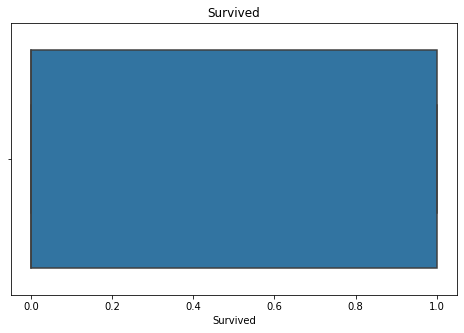

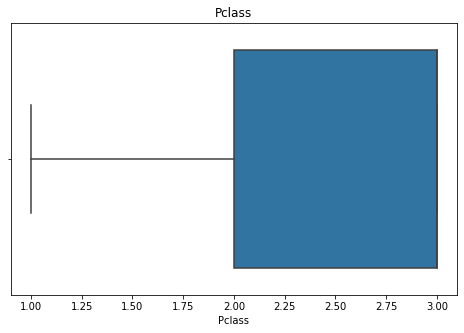

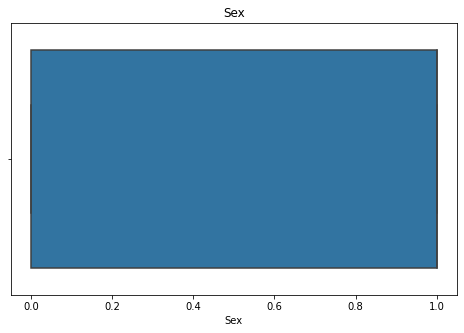

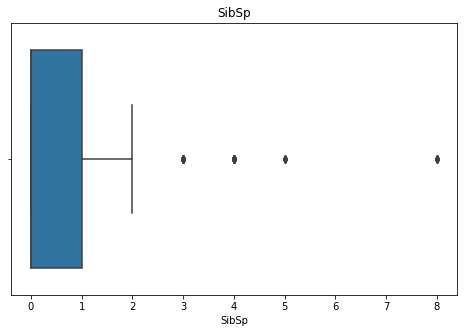

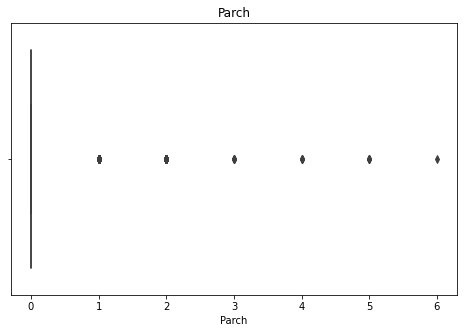

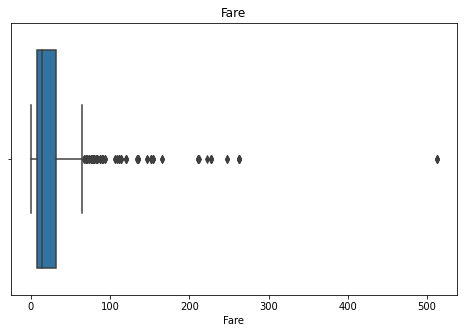

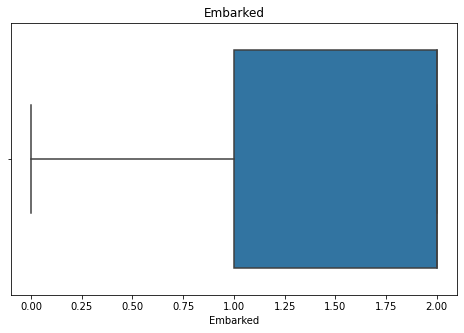

In [ ]:
# Cheking for outliers
#titanic_train
for i, j in enumerate(column1):
  plt.figure(figsize=(8,5))
  plt.title(j)
  sns.boxplot(titanic_train[j])

In [ ]:
column2 =titanic_test.columns


# **5.Exploratory Data Analysis**

##***a. Univariate*** 

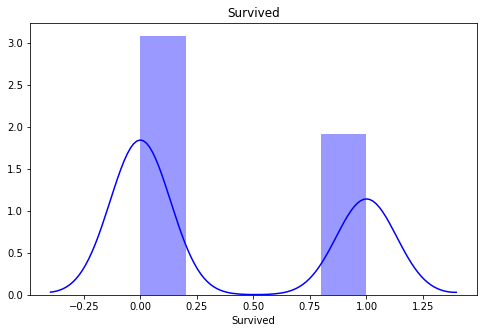

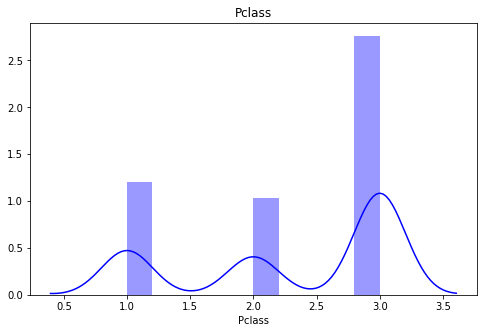

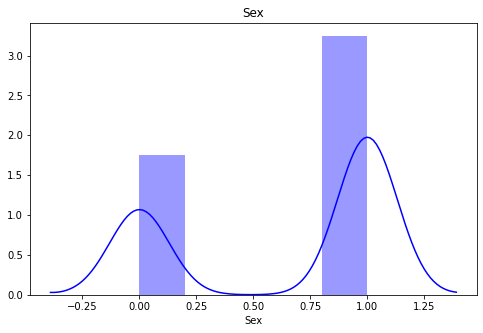

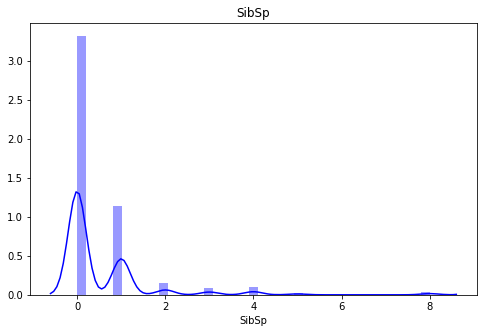

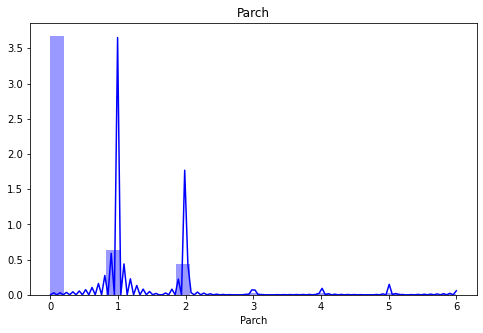

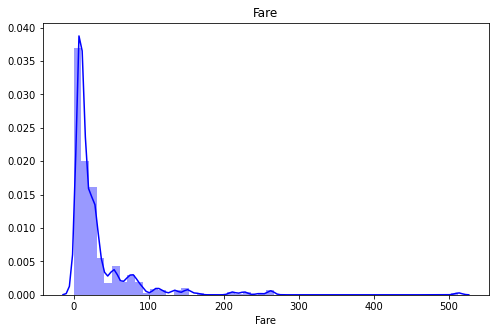

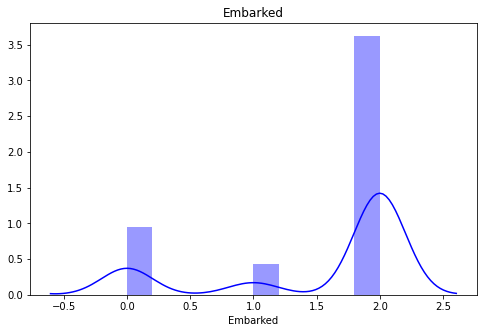

In [ ]:
# Plot histogram for numerical values
#titanic_train
for i, j in enumerate(column1):
  plt.figure(figsize=(8, 5))
  plt.title(j)
  sns.distplot(titanic_train[j], color='blue', norm_hist=True)

In [ ]:
percentages_survived_died =titanic_train['Survived'].value_counts()* 100/ len(titanic_train)
percentages_survived_died

#This means 61% of the people Died

0    61.754781
1    38.245219
Name: Survived, dtype: float64

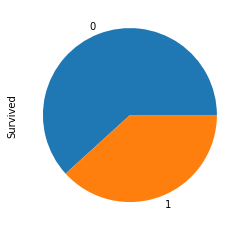

In [ ]:
#This is a pie chart representation of the people who survived and died
%matplotlib inline

alpha_color = 0.5
percentages_survived_died.plot(kind = 'pie')

In [ ]:
pclass_train = titanic_train['Pclass'].value_counts()* 100/ len(titanic_train)
pclass_train

3    55.230596
1    24.071991
2    20.697413
Name: Pclass, dtype: float64

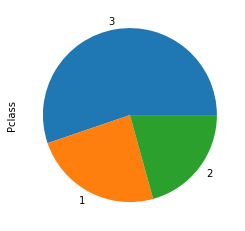

In [ ]:
pclass_train.plot(kind = 'pie')

In [ ]:

gender_train = titanic_train['Sex'].value_counts()* 100/ len(titanic_train)
gender_train

1    64.904387
0    35.095613
Name: Sex, dtype: float64

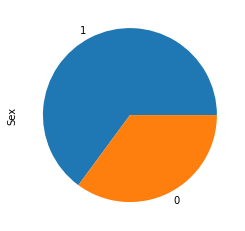

In [ ]:
gender_train.plot(kind ='pie')

##***b. Bivariate***



---


Bivariate analysis is one of the simplest forms of quantitative analysis. It involves the analysis of two variables, for the purpose of determining the empirical relationship between them.

i). Correlation


---
In statistics, correlation or dependence is any statistical relationship, whether causal or not, between two random variables or bivariate data


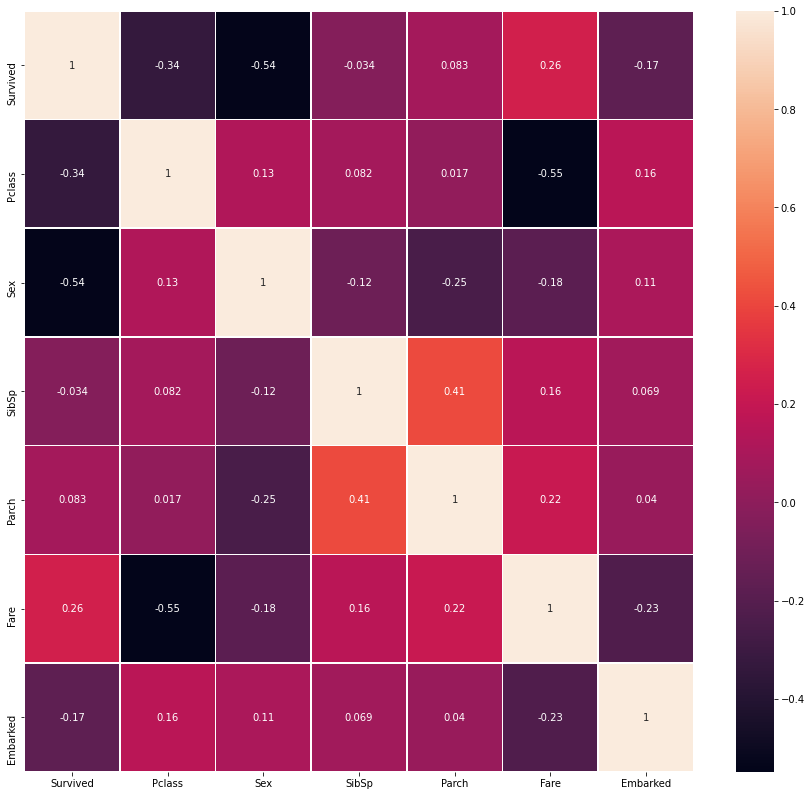

In [ ]:
# Create a correlation matrix
corrMatrix = titanic_train.corr()
corrMatrix

# Vizualise the correlation matrix using a heat map

fig, ax = plt.subplots(figsize=(15,14)) 
sns.heatmap(corrMatrix, annot=True,  linewidths=.5, ax=ax)

ii). pair plots

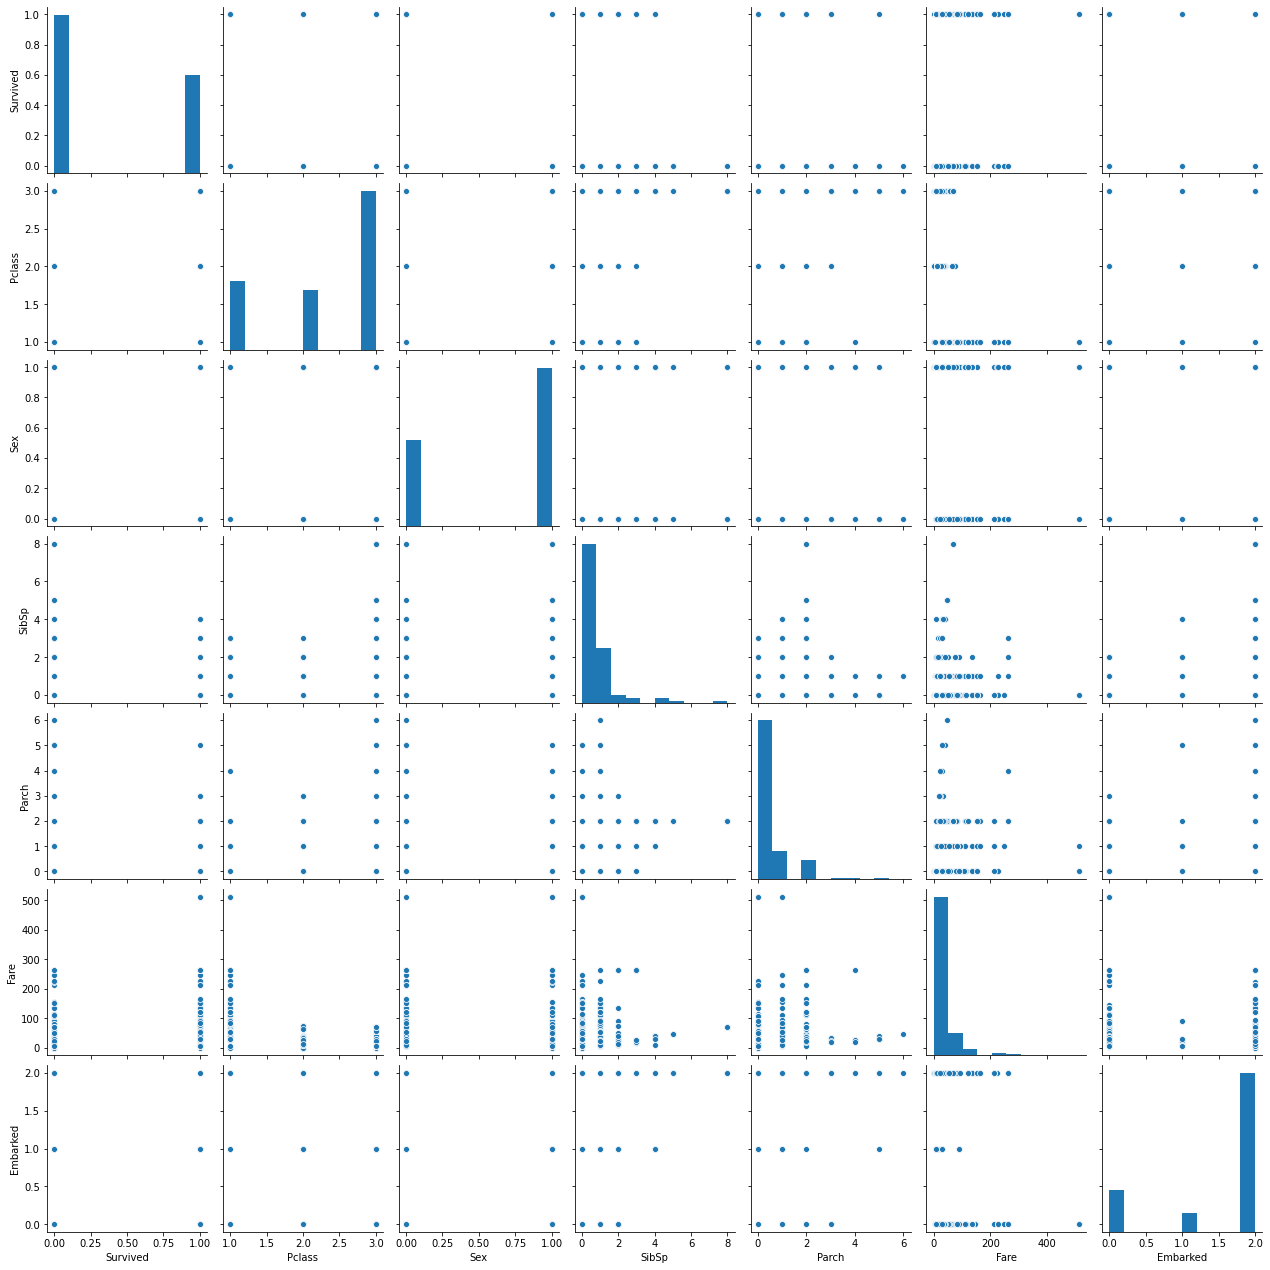

In [ ]:
# drawing scatter plots on numeric variables to visualize any correlation
column3= ['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked']
sns.pairplot(titanic_train[column3])

***.Splitting the Data***

In [ ]:
#the X variable
X= titanic_train.iloc[:, 1:]
X.head()


,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,22,1,0,7.2500,2
1,1,0,38,1,0,71.2833,0
2,3,0,26,0,0,7.9250,2
3,1,0,35,1,0,53.1000,2
4,3,1,35,0,0,8.0500,2


In [ ]:
#The Y variable
y= titanic_train.iloc[:, :1]
y.head()

,Survived
0,0
1,1
2,1
3,1
4,0


In [ ]:
titanic_test = titanic_test.values
titanic_test

array([[3, 1, 34.5, ..., 0, 7.8292, 1],
       [3, 0, 47.0, ..., 0, 7.0, 2],
       [2, 1, 62.0, ..., 0, 9.6875, 1],
       ...,
       [3, 1, 38.5, ..., 0, 7.25, 2],
       [3, 1,
        <bound method Series.mean of 0      34.5
1      47.0
2      62.0
3      27.0
4      22.0
       ... 
413     NaN
414    39.0
415    38.5
416     NaN
417     NaN
Name: Age, Length: 418, dtype: float64>,
        ..., 0, 8.05, 2],
       [3, 1,
        <bound method Series.mean of 0      34.5
1      47.0
2      62.0
3      27.0
4      22.0
       ... 
413     NaN
414    39.0
415    38.5
416     NaN
417     NaN
Name: Age, Length: 418, dtype: float64>,
        ..., 1, 22.3583, 0]], dtype=object)

# ***6. Implementing the solution***

## ***a. Multicollinearity and VIF***


Why is detecting multicollinearity important?

The R² values will be large in the mutilpe regression analysis but none of the individual Beta weights will be statistically significant

May lead to wrong predictions

In [ ]:
#Import our dependencies
import statsmodels.api as sm
from scipy import stats

We will calculate VIF (Variance Inflation Factor) which is used for detecting multicollinearity in python.

**VIF = 1/(1-R²)**

In [ ]:
#find correlations
correlations = X.corr()

In [ ]:
pd.DataFrame(np.linalg.inv(correlations.values), index = correlations.index, columns=correlations.columns)

,Pclass,Sex,SibSp,Parch,Fare,Embarked
Pclass,1.515611,-0.095802,-0.211800,-0.151164,0.876026,-0.020061
Sex,-0.095802,1.100825,0.028096,0.253013,0.062562,-0.103678
SibSp,-0.211800,0.028096,1.252651,-0.454267,-0.233932,-0.089095
Parch,-0.151164,0.253013,-0.454267,1.315674,-0.269919,-0.086022
Fare,0.876026,0.062562,-0.233932,-0.269919,1.643948,0.247913
Embarked,-0.020061,-0.103678,-0.089095,-0.086022,0.247913,1.080465


A VIF of more than 5 would mean we dropp those columns but since none is above 5, we will leave it that way.

## ***b. KNN classifier*** 

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

clf = KNeighborsClassifier()

from sklearn.model_selection import GridSearchCV

search = GridSearchCV(clf, param_grid= {'n_neighbors': np.arange(1,30, 2)}, n_jobs= 1, refit=True, cv = 5)

In [ ]:
y_pred = clf.predict(titanic_test)

TypeError: ignored

In [ ]:
search.best_params_

AttributeError: ignored

In [ ]:
clf = KNeighborsClassifier(n_neighbors=1)
clf.fit(X_train, y_train)

TypeError: ignored

In [ ]:
y_pred = clf.predict(X_test)

In [ ]:
confusion = pd.DataFrame({'Actual': y_test.flatten(), 'Predict': y_pred.flatten()})

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

In [ ]:
from sklearn.metrics import  classification_report
print(classification_report(y_test, y_pred))

#***7.Challenging the Solution***

In [ ]:
#For future , its better to use a better algorithm for a better and higher accuracy.

# ***8. Follow up questions***


At this point, we can refine our question or collect new data, all in an iterative process to get at the truth.



## **a). Did we have the right data?**


In [ ]:
#Yes. The data was fine. Had the required number Rows and Columns. It was sufficient for this experiment.

## **b). Do we need other data to answer our question?**


In [ ]:
#I guess not. This data was sufficient to answer the question.

## **c). Did we have the right question?**

In [ ]:
#Yes, The Question was very accurate and right. We were using the KNN classifier to make decisions on those
# who survived and those who did not.
